## Homework 8-2 

Using one or more of the datasets we have been using, ask two or more research questions, make appropriate model(s), and test your model(s) using regression. You might pick one easy and one hard research question. You might start with a simple linear model, but feel free to branch out to a non-linear model, or fancy statistics tests if you feel confident about doing so and can explain them. The point is that you are designing the modeling, not following a tutorial, and that you develop expertise on the methods you are using so you can defend their usage.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from scipy import stats

In [6]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

# convert the data set into a pandas data frame  
df1 = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

df1["MEDV"] = target["MEDV"] # add the median value from target to new data frame

## Question 1: How strong is the correlation between distance to employment centers and age of the home

* ### Perform a linear regression to see if there is a correlation between the two variables

In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df1["AGE"],df1["DIS"]) #linear regression using scipy

In [8]:
slope

-0.05594612178624682

In [9]:
intercept

7.631542460966008

In [10]:
r_value

-0.747880540868632

In [11]:
std_err

0.0022119817617867288

* the r-value shows a relatively strong correlation and the slope tells us that this corrleation is negative

* ### Plot the variables with the line of best fit

Text(0.5,1,'Home Age vs. Location')

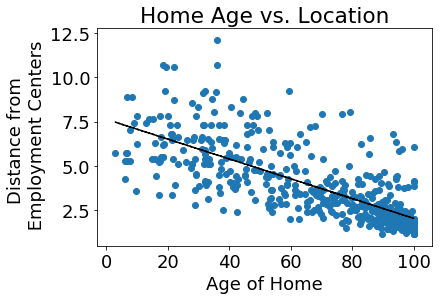

In [12]:
plt.rcParams.update({'font.size': 18})
plt.plot(df1["AGE"], slope*df1["AGE"]+intercept, 'k--')
plt.scatter(df1["AGE"], df1["DIS"])
plt.xlabel('Age of Home')
plt.ylabel('Distance from \n Employment Centers')
plt.title('Home Age vs. Location')

## Question 2: Do older homes that are close to employment centers have a higher value than newer homes

* ### Make histograms to visualize the spread of the data

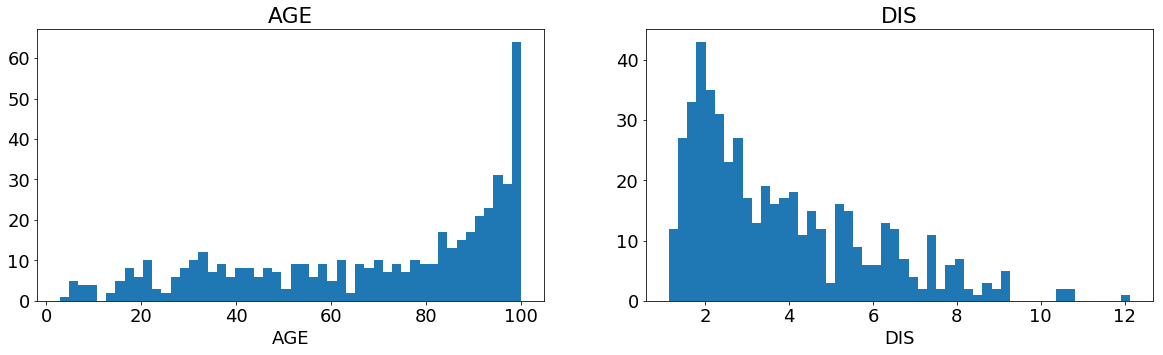

In [14]:
plt.figure(figsize=(20, 5))

features = ['AGE', 'DIS']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1) #this line defines where in the sub plot the fig would go,  
    x = df1[col]                           # if there were variable I think they would all end up on one line
    plt.hist(x, bins = 50)
    plt.title(col)
    plt.xlabel(col)

* ### Split the data into two equally sized groups 
    * The groups are old homes that are close to employment and younger homes that are further away 

In [22]:
AGE = df1['AGE']
DIS = df1['DIS']
old = df1[AGE >= 74] #filter out all homes that are less than 74 yrs old
old = old[DIS < 2.9]  #from filtered data, filter out all homes that with distance more than 3
old.sample(5) # check data to see that it worked

C:\Users\emull\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
115,0.17134,0.0,10.01,0.0,0.547,5.928,88.2,2.4631,6.0,432.0,17.8,344.91,15.76,18.3
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,20.5
138,0.24980,0.0,21.89,0.0,0.624,5.857,98.2,1.6686,4.0,437.0,21.2,392.04,21.32,13.3
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
124,0.09849,0.0,25.65,0.0,0.581,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58,18.8


In [23]:
other = df1[AGE < 74]
other = other[DIS >= 3]
#other = other[DIS < 10.5]
other.sample(5)

C:\Users\emull\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
81,0.04462,25.0,4.86,0.0,0.426,6.619,70.4,5.4007,4.0,281.0,19.0,395.63,7.22,23.9
295,0.12932,0.0,13.92,0.0,0.437,6.678,31.1,5.9604,4.0,289.0,16.0,396.90,6.27,28.6
339,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74,19.0
251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59,24.8
77,0.08707,0.0,12.83,0.0,0.437,6.140,45.8,4.0905,5.0,398.0,18.7,386.96,10.27,20.8


* ### Look at the shape of the two new data frames to ensure that they are the same size

In [24]:
old.shape

(210, 14)

In [25]:
other.shape

(210, 14)

* ### Plot the data

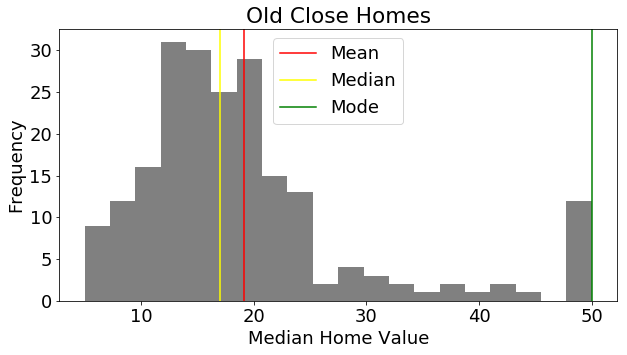

In [27]:
value = old['MEDV']

mean=value.mean()
median=value.median()
mode=value.mode()

plt.figure(figsize=(10,5))
plt.hist(old['MEDV'], bins = 20, color = 'grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')
plt.title('Old Close Homes')
plt.legend()
plt.show()

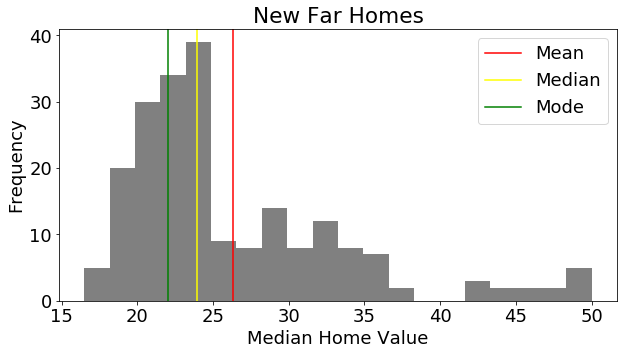

In [28]:
value = other['MEDV']

mean=value.mean()
median=value.median()
mode=value.mode()

plt.figure(figsize=(10,5))
plt.hist(other['MEDV'], bins = 20, color = 'grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')
plt.title('New Far Homes')
plt.legend()
plt.show()

* ### Run an ANOVA to see if there is a difference between the two sets of data

In [29]:
# make objects containg the data to be compared
med_o = old['MEDV']
med_n = other['MEDV']

In [30]:
import scipy.stats as stats
stats.f_oneway(med_o, med_n)

F_onewayResult(statistic=68.79595042380318, pvalue=1.514404297132903e-15)

* F-value = 68.796
    * F value = (variance of the group means 'Mean Square Between') / (mean of the within group variances 'Mean Squared Error')
    
* p-value = 1.5e-15

* #### There is a statistically significant difference between the means of the two sets of data

# Additional Question: Can you remove NaN's from a single column using df.dropna(col_name)?
* If not, how can you do this

In [32]:
#read in the file and combine the sheets
file = "movies.xls"
movies_sheet1 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_sheet2 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_sheet3 = pd.read_excel(file, sheet_name=2, index_col=0)
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])


In [34]:
# look for NaNs
#movies.isna().sum
#tons of NANs

* ### try df.dropna(col_name)

In [36]:
df1 = movies.dropna('Year')

ValueError: No axis named Year for object type <class 'type'>

* ### That didn't work, but it will work if you subset the data

In [37]:
df2 = movies.dropna(subset=['Year'])
df2.isna().sum 
#No longer has NaN's in YEAR!

<bound method DataFrame.sum of                                                     Year  Genres  Language  \
Title                                                                        
Intolerance: Love's Struggle Throughout the Ages   False   False      True   
Over the Hill to the Poorhouse                     False   False      True   
The Big Parade                                     False   False      True   
Metropolis                                         False   False     False   
Pandora's Box                                      False   False     False   
The Broadway Melody                                False   False     False   
Hell's Angels                                      False   False     False   
A Farewell to Arms                                 False   False     False   
42nd Street                                        False   False     False   
She Done Him Wrong                                 False   False     False   
It Happened One Night            